In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The `plt.pcolor` and `plt.pcolormesh` options can be a little confusing.

- Offical docs: http://matplotlib.org/2.0.0/api/pyplot_api.html#matplotlib.pyplot.pcolor
- Also `help(plt.pcolor)`

The first thing to know is that:

- These methods treat the data as a _matrix_ not as (x,y) values
- In matrix notation `D[i,j]` corresponds to the `i`th row (i.e. "up and down") and the `j`th column (i.e. "left and right")
- Then we further complicate matters by the fact that we visual a matrix with the row/column indices increasing down and right from the top left corner.  When plotting, we increase up and to the right from the bottom left corner.

For colour maps:

- http://matplotlib.org/examples/color/colormaps_reference.html

In [2]:
D = np.array([[0,1,2],[3,4,5]])
D

array([[0, 1, 2],
       [3, 4, 5]])

As a matrix then, `D` has 2 rows, and 3 columns.  In the 2nd plot, we change the (1,2) entry to 0.  In a matrix, this would make the bottom right entry 0, but on the plot, the top right entry becomes 0 instead.

- Notice that the data is automatically scaled to the interval [0,1]

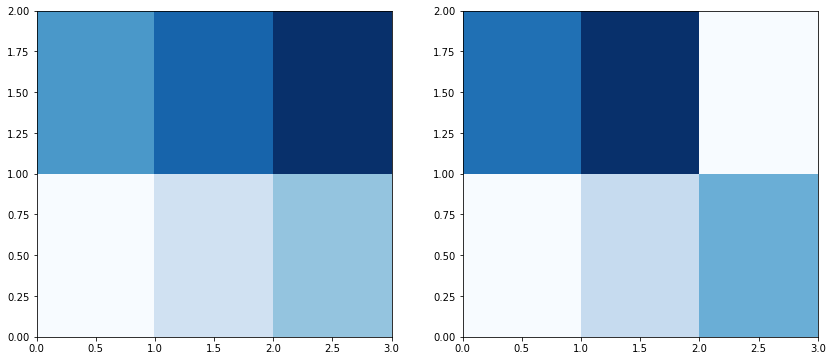

In [3]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].pcolor(D, cmap="Blues")
D[1][2] = 0
_ = ax[1].pcolor(D, cmap="Blues")

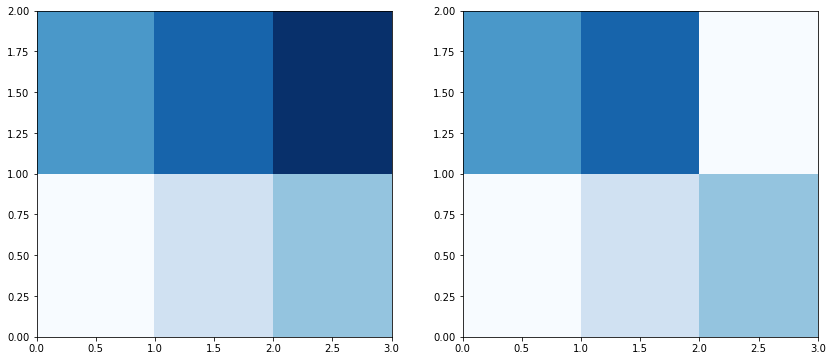

In [4]:
# Stop the scaling by supplying vmin and vmax
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
D[1][2] = 5
ax[0].pcolor(D, cmap="Blues", vmin=0, vmax=5)
D[1][2] = 0
_ = ax[1].pcolor(D, cmap="Blues", vmin=0, vmax=5)

If we don't want a regular grid, or wish to use a regular grid but with offsets, we have two options.

The easier option is to pass in x and y coords for a regular grid.  The (0,0) data entry will be plotted on the rectangle with coords (x[0],y[0]), (x[1],y[0]), (x[1], y[1]) and (x[0],y[1]).  As such, `x` should have one more entry than the number of columns in the data, and `y` one more entry than the number of rows.

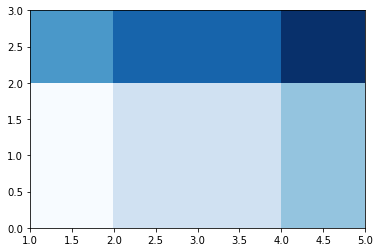

In [5]:
x = [1,2,4,5]
y = [0,2,3]

D[1][2] = 5
_ = plt.pcolor(x, y, D, cmap="Blues", vmin=0, vmax=5)

For a genuine quadrilateral grid, you can pass in two arrays, `X` and `Y` say.  Then the (0,0) data entry is plotted in the quadrilateral with coords (X[0,0], Y[0,0]), (X[1,0], Y[1,0]), (X[1,1], Y[1,1]) and (X[0,1], Y[0,1]).

In [6]:
X, Y = np.meshgrid(x, y)
X = X.astype(np.float64)
Y = Y.astype(np.float64)
X

array([[ 1.,  2.,  4.,  5.],
       [ 1.,  2.,  4.,  5.],
       [ 1.,  2.,  4.,  5.]])

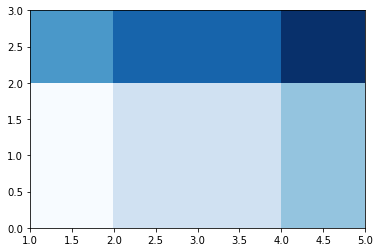

In [7]:
_ = plt.pcolor(X, Y, D, cmap="Blues", vmin=0, vmax=5)

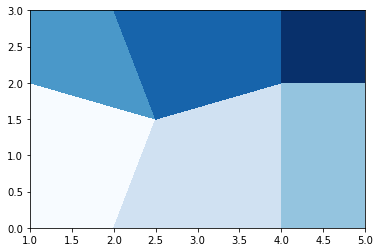

In [8]:
X[1,1] = 2.5
Y[1,1] = 1.5
_ = plt.pcolor(X, Y, D, cmap="Blues", vmin=0, vmax=5)

# Other options

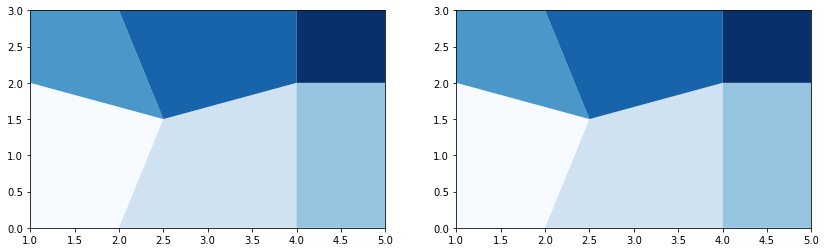

In [9]:
# Turn on antialiasing 
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
_ = ax[0].pcolor(X, Y, D, cmap="Blues", vmin=0, vmax=5, edgecolors=None)
_ = ax[1].pcolor(X, Y, D, cmap="Blues", vmin=0, vmax=5, antialiased=True)

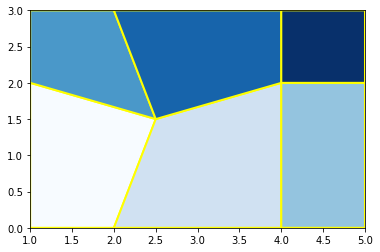

In [10]:
# My eyes...
_ = plt.pcolor(X, Y, D, cmap="Blues", vmin=0, vmax=5, edgecolors="yellow", linewidth = 2.0 )

# `pcolormesh` instead

We can also call `pcolormesh` which produces a very similar output.  Under the hood, it uses different geometry primitives, and so is apparently a lot faster.

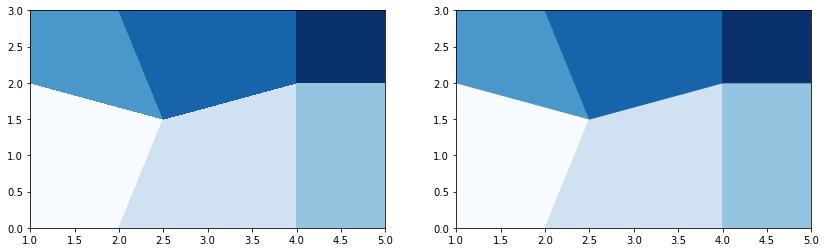

In [11]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
_ = ax[0].pcolormesh(X, Y, D, cmap="Blues", vmin=0, vmax=5)
_ = ax[1].pcolormesh(X, Y, D, cmap="Blues", vmin=0, vmax=5, antialiased=True)

A feature unique to the mesh version is that we can use [Gouraud shading](https://en.wikipedia.org/wiki/Gouraud_shading) to interpolate the colour across the mesh.  For this to work, we need to know the colour (i.e. the intensity) at the right and top edges, and so the coordinates need to be the same dimension as the data.

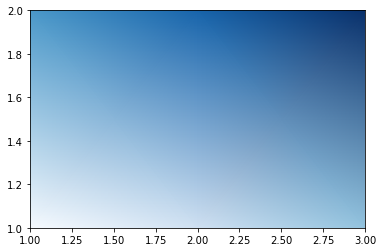

In [12]:
_ = plt.pcolormesh([1,2,3], [1,2], D, cmap="Blues", vmin=0, vmax=5, shading="gouraud")

# Colour maps

As final word on colour maps.

- Read the docs: http://matplotlib.org/2.0.0/api/colors_api.html#matplotlib.colors.Colormap

In [13]:
import matplotlib.colors

In [14]:
cmap = matplotlib.colors.ListedColormap(["red", "blue", "green", "yellow", "pink", "purple"])

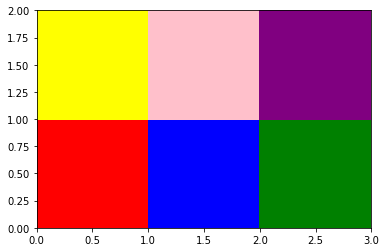

In [15]:
plt.pcolor(D, cmap=cmap)

In [16]:
# All known colours; basically a dictionary (though the actual )
known_colours = matplotlib.colors.get_named_colors_mapping()
type(known_colours), [(key,known_colours[key]) for i, key in enumerate(known_colours.keys()) if i<3]

(matplotlib.colors._ColorMapping,
 [('xkcd:cloudy blue', '#acc2d9'),
  ('xkcd:dark pastel green', '#56ae57'),
  ('xkcd:dust', '#b2996e')])